在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [1]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv_to_list(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)    

enrollments = read_csv_to_list('enrollments.csv')

daily_engagement = read_csv_to_list('daily-engagement.csv')

project_submissions = read_csv_to_list('project-submissions.csv')

In [2]:
print enrollments[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


In [3]:
print daily_engagement[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}


In [4]:
print project_submissions[0]

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## 修正数据类型

In [5]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'].lower() == 'true'
    enrollment['is_udacity'] = enrollment['is_udacity'].lower() == 'true'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [6]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed'])) # 字符串是带小数的，但是完成课程本身肯定是整形，因此先转成float再转成int
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [7]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [8]:
## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量

def get_unique_count(data, key):
    unique_dict = set()
    for element in data:
        unique_dict.add(element[key])
    return len(unique_dict)    

## 数据中的问题

In [9]:
## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"

for engagement_record in daily_engagement:
    engagement_record['account_key']=engagement_record.pop('acct')
print daily_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [10]:
enrollments_count = len(enrollments)
print enrollments_count
enrollments_unique_count = get_unique_count(enrollments, 'account_key')
print enrollments_unique_count

1640
1302


In [11]:
engagement_count = len(daily_engagement)
print engagement_count
engagement_unique_count = get_unique_count(daily_engagement, 'account_key')
print engagement_unique_count

136240
1237


In [12]:
submission_count = len(project_submissions)
print submission_count
submission_unique_count = get_unique_count(project_submissions, 'account_key')
print submission_unique_count

3642
743


## 缺失的互动（Engagement）记录

In [13]:
## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。

engagement_accounts = set()
for engagement_record in daily_engagement:
    engagement_accounts.add(engagement_record['account_key'])
for enrollment in enrollments:
    if not enrollment['account_key'] in engagement_accounts:
        print enrollment # join_date is same to cancel_date, and days_to_cancel is zero!
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## 检查更多的问题记录

In [14]:
## 计算无众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）
one_day_students = 0
for enrollment in enrollments:
    if not enrollment['account_key'] in engagement_accounts and enrollment['join_date'] != enrollment['cancel_date']:
        one_day_students+=1
        print enrollment
print one_day_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## 追踪剩余的问题

In [15]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [16]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [17]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## 重新定义问题

In [18]:
#####################################
#                 6                 #
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。
paid_students={}
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] is None or enrollment['days_to_cancel'] > 7: # 如果该学生注册时间超过7天或压根还未注销
        account_key = enrollment['account_key']
        if account_key not in paid_students or enrollment['join_date'] > paid_students[account_key]:
            paid_students[enrollment['account_key']]=enrollment['join_date']
print len(paid_students)

995


## 获取第1周的数据
获取第1周的数据

In [19]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return 0 <= time_delta.days < 7

In [32]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

for engagement in paid_engagement:
    engagement['has_visited'] = 1 if engagement['num_courses_visited'] > 0 else 0


print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [33]:
#####################################
#                 7                 #
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    if engagement_record['account_key'] in paid_students:
        if paid_students[engagement_record['account_key']] is None or engagement_record['utc_date'] is None:
            print paid_students[engagement_record['account_key']]
            print engagement_record
        if within_one_week(paid_students[engagement_record['account_key']], engagement_record['utc_date']):
            paid_engagement_in_first_week.append(engagement_record)

print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [34]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表

def group_by_key(data, key):
    group = defaultdict(list)
    for element in data:
        v_key = element[key]
        group[v_key].append(element)
    return group
        
engagement_by_account = group_by_key(paid_engagement_in_first_week, 'account_key')

In [35]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
def count_group(group, key):
    total_group = {}
    for account_key, value in group.items():
        total_item = 0
        for element in value:
            total_item += element[key]
        total_group[account_key] = total_item
    return total_group
    
total_minutes_by_account = count_group(engagement_by_account, 'total_minutes_visited')

Populating the interactive namespace from numpy and matplotlib
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645
163 3564.7332645
7
[{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}, {u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2

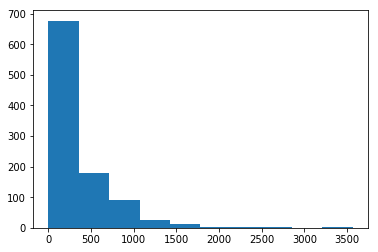

In [103]:
import numpy as np
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt

def describe_data(data):
    print 'Mean:', np.mean(data) # 平均值
    print 'Standard deviation:', np.std(data) # 标准偏差
    print 'Minimum:', np.min(data) # 最小值
    print 'Maximum:', np.max(data) # 最大值
    plt.figure()
    plt.hist(data)

# 汇总和描述关于教室所花时间的数据
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

for key,value in total_minutes_by_account.items():
    if value == np.max(total_minutes):
        print key,value
        print len(engagement_by_account[key])
        print engagement_by_account[key]
        # 有的天数，比如idx为1时，当天观看时间为688分钟，可以看到当天完成课程数为5，因此应该是该学生跳过了一些可能导致时间很长
        # 另外，这里的数据远远超过7条，也就是超过了一周的时间

## 纠错现有的数据分析代码

In [37]:
#####################################
#                 8                 #
#####################################

## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。

## 第1周完成的课程数（Lessons）

In [38]:
## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码

lession_by_account = count_group(engagement_by_account, 'lessons_completed')

describe_data(lession_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## 第1周的访问次数

In [39]:
######################################
#                 10                 #
######################################

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。
# 方法1
# days_by_account = [len(engagement_by_account[key]) for key in engagement_by_account.keys()]
# 方法2，向数据集中增加一列用于表示当天是否有上学
# 此操作放到前方，在计算付费学生集合的地方

days_by_account = count_group(engagement_by_account, 'has_visited')

describe_data(days_by_account.values())

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## 区分项目通过的学生

In [58]:
######################################
#                 11                 #
######################################

## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。

subway_project_lesson_keys = ['746169184', '3176718735']
ratings = ['PASSED', 'DISTINCTION']

def check_proj_pass(account_key, project_lesson_keys):
    for submission in paid_submissions:
        if submission['account_key'] == account_key and submission['lesson_key'] in project_lesson_keys \
        and submission['assigned_rating'] in ratings:
            return True
    return False

passing_engagement = []
non_passing_engagement = []
for engagement in paid_engagement_in_first_week:
    if check_proj_pass(engagement['account_key'], subway_project_lesson_keys):
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print len(passing_engagement)
print len(non_passing_engagement)


4527
2392


## 对比两组学生数据

In [70]:
######################################
#                 12                 #
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。

passing_engagement_by_account = group_by_key(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_by_key(non_passing_engagement, 'account_key')

    Passing Student lessons_completed:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Non Passing Student lessons_completed:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


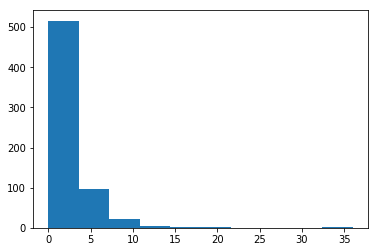

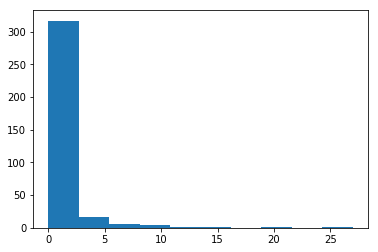

In [104]:
print '    Passing Student lessons_completed:'
passing_lesson_completes_count = count_group(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lesson_completes_count.values())

print 'Non Passing Student lessons_completed:'
non_passing_lesson_completes_count = count_group(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lesson_completes_count.values())

    Passing Student days:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Non Passing Student days:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


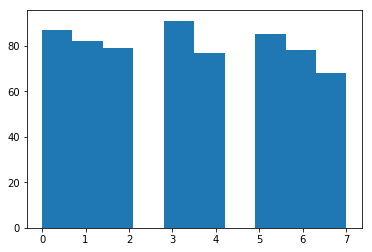

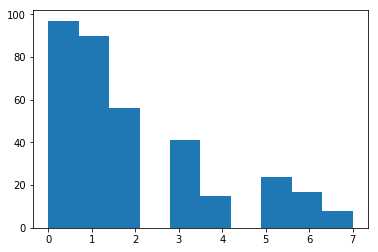

In [105]:
print '    Passing Student days:'
passing_lesson_completes_count = count_group(passing_engagement_by_account, 'has_visited')
describe_data(passing_lesson_completes_count.values())

print 'Non Passing Student days:'
non_passing_lesson_completes_count = count_group(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_lesson_completes_count.values())

    Passing Student total spend minutes:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Non Passing Student total spend minutes:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


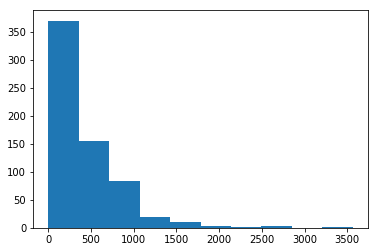

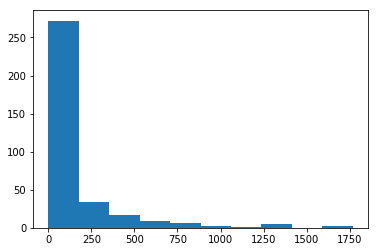

In [106]:
print '    Passing Student total spend minutes:'
passing_lesson_completes_count = count_group(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_lesson_completes_count.values())

print 'Non Passing Student total spend minutes:'
non_passing_lesson_completes_count = count_group(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_lesson_completes_count.values())

## 制作直方图

In [98]:
######################################
#                 13                 #
######################################

## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。

# 修改了describe_data方法，使其具有绘图的功能


## 改进图表及分享发现

In [ ]:
######################################
#                 14                 #
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。